In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import minimize_scalar
from scipy.stats import t

In [156]:
dt1 = 8.82e-2
dt2 = 1.011e-1
dt3 = 1.058e-1
dt4 = 1.147e-1
dt5 = 1.17e-1

precision_1 = np.array([5.902e-4, 5.902e-4, 1.584e-3, 7.239e-4, 1.040e-3, 7.685e-4, 7.685e-4, 8.365e-4, 8.025e-4])
precision_2 = np.array([3.596e-3, 2.200e-3, 6.990e-4, 1.251e-3, 1.251e-3, 1.014e-3, 1.014e-3, 1.074e-3, 1.074e-3])
precision_3 = np.array([9.438e-4, 9.438e-4, 9.438e-4, 9.438e-4, 9.438e-4, 1.170e-3, 1.170e-3, 1.170e-3, 1.170e-3])
precision_4 = np.array([2.764e-3, 1.606e-3, 2.120e-3, 1.284e-3, 1.284e-3, 1.284e-3, 1.388e-3, 1.388e-3, 1.362e-3])
precision_5 = np.array([2.702e-3, 1.550e-3, 2.037e-3, 1.218e-3, 1.627e-3, 1.422e-3, 1.422e-3, 1.422e-3, 1.422e-3])

powers_of_2 = np.arange(14, 23, 1)

Dopasowanie dla $\epsilon = \frac{k2^{-x}}{dt}$

In [157]:
#x = 2.0 ** (-1 * powers_of_2)
x = powers_of_2

def model(x, alpha, dt):
    return alpha * 2.0**(-x) / dt

def model_log(x, alpha, dt):
    return alpha - x * np.log(2.0) - np.log(dt)

#precision_2_new = np.array([6.506e-2, 3.328e-2, 1.126e-2, 3.411e-3, 1.635e-3, 1.078e-3, 5.892e-4, 2.493e-4])
#x_new = np.array([14, 15, 16, 18, 19, 20, 21, 22])

params_1, matr_cov_1 = curve_fit(lambda x, a: model(x, a, dt1), x, precision_1)
perr_1 = np.sqrt(np.diag(matr_cov_1))

params_2, matr_cov_2 = curve_fit(lambda x, a: model(x, a, dt2), x, precision_2)
perr_2 = np.sqrt(np.diag(matr_cov_2))

params_3, matr_cov_3 = curve_fit(lambda x, a: model(x, a, dt3), x, precision_3)
perr_3 = np.sqrt(np.diag(matr_cov_3))

params_4, matr_cov_4 = curve_fit(lambda x, a: model(x, a, dt4), x, precision_4)
perr_4 = np.sqrt(np.diag(matr_cov_4))

params_5, matr_cov_5 = curve_fit(lambda x, a: model(x, a, dt5), x, precision_5)
perr_5 = np.sqrt(np.diag(matr_cov_5))

dof = len(powers_of_2) - len(params_1)
tval = t.ppf(0.975, dof)


print(f"Parametr k dla dt1: {params_1[0]:0.2f} ± {(tval * perr_1[0]):0.2f}")
print(f"Parametr k dla dt2: {params_2[0]:0.2f} ± {(tval * perr_2[0]):0.2f}")
print(f"Parametr k dla dt3: {params_3[0]:0.2f} ± {(tval * perr_3[0]):0.2f}")
print(f"Parametr k dla dt4: {params_4[0]:0.2f} ± {(tval * perr_4[0]):0.2f}")
print(f"Parametr k dla dt5: {params_5[0]:0.2f} ± {(tval * perr_5[0]):0.2f}")

# Wykres (opcjonalnie)
x_dense = np.linspace(x.min(), x.max(), 500)

Parametr k dla dt1: 1.61 ± 2.43
Parametr k dla dt2: 6.42 ± 2.80
Parametr k dla dt3: 2.47 ± 3.29
Parametr k dla dt4: 6.22 ± 4.35
Parametr k dla dt5: 6.22 ± 4.70


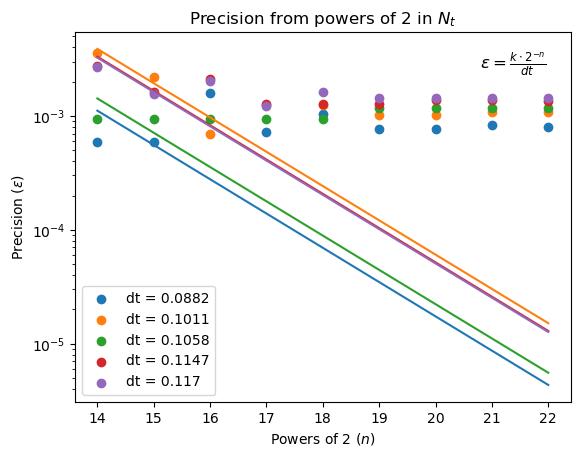

In [158]:
plt.plot(x_dense, model(x_dense, *params_1, dt1), '-')
plt.plot(x_dense, model(x_dense, *params_2, dt2), '-')
plt.plot(x_dense, model(x_dense, *params_3, dt3), '-')
plt.plot(x_dense, model(x_dense, *params_4, dt4), '-')
plt.plot(x_dense, model(x_dense, *params_5, dt5), '-')

plt.scatter(powers_of_2, precision_1, label = f'dt = {dt1}')
plt.scatter(powers_of_2, precision_2, label = f'dt = {dt2}')
plt.scatter(powers_of_2, precision_3, label = f'dt = {dt3}')
plt.scatter(powers_of_2, precision_4, label = f'dt = {dt4}')
plt.scatter(powers_of_2, precision_5, label = f'dt = {dt5}')
plt.xlabel('Powers of 2 ($n$)')
plt.ylabel('Precision ($\epsilon$)')
plt.title('Precision from powers of 2 in $N_t$')
plt.legend()
plt.yscale('log')

plt.text(
    0.95, 0.95, r"$\epsilon = \frac{k \cdot 2^{-n}}{dt}$",
    transform=plt.gca().transAxes,
    ha='right', va='top',
    fontsize=12
)

plt.show()

In [55]:
def precision_model(x, dt, alpha=params_4[0]):
    return alpha / dt * 2.0 ** (-x)

def mean_precision_over_x(dt):
    y = precision_model(powers_of_2, dt)
    return np.sum(y)

In [50]:
result = minimize_scalar(mean_precision_over_x, bounds=(0.0045, 0.006506), method='bounded')
optimal_dt = result.x
print(f"Optymalne dt: {optimal_dt:.6f}")




Optymalne dt: 0.006500


Najlepšaje značeńnie $dt$ heta $dt_{max}$.

Szacowanie parametru $k$.

In [40]:
k = (params_1[0] / (tval * perr_1[0]) ** 2 + params_2[0] / (tval * perr_2[0]) ** 2 + params_3[0] / (tval * perr_3[0]) ** 2 + params_4[0] / (tval * perr_4[0]) ** 2 + params_5[0] / (tval * perr_5[0]) ** 2) / (1 / (tval * perr_1[0]) ** 2 + 1 / (tval * perr_2[0]) ** 2 + 1 / (tval * perr_3[0]) ** 2 + 1 / (tval * perr_4[0]) ** 2 + 1 / (tval * perr_5[0]) ** 2)
k

np.float64(5.773258165691483)

In [41]:
dk = np.sqrt(1 / (1 / (tval * perr_1[0]) ** 2 + 1 / (tval * perr_2[0]) ** 2 + 1 / (tval * perr_3[0]) ** 2 + 1 / (tval * perr_4[0]) ** 2 + 1 / (tval * perr_5[0]) ** 2))
dk

np.float64(0.15950967650219414)

Dopasowanie dla $\epsilon = \frac{k2^{-\lambda x}}{dt}$

In [159]:
#x = 2.0 ** (-1 * powers_of_2)
x = powers_of_2

def model(x, alpha, beta, dt):
    return alpha * 2.0**(-beta * x) / dt

params_1, matr_cov_1 = curve_fit(lambda x, a, b: model(x, a, b, dt1), x, precision_1)
perr_1 = np.sqrt(np.diag(matr_cov_1))

params_2, matr_cov_2 = curve_fit(lambda x, a, b: model(x, a, b, dt2), x, precision_2)
perr_2 = np.sqrt(np.diag(matr_cov_2))

params_3, matr_cov_3 = curve_fit(lambda x, a, b: model(x, a, b, dt3), x, precision_3)
perr_3 = np.sqrt(np.diag(matr_cov_3))

params_4, matr_cov_4 = curve_fit(lambda x, a, b: model(x, a, b, dt4), x, precision_4)
perr_4 = np.sqrt(np.diag(matr_cov_4))

params_5, matr_cov_5 = curve_fit(lambda x, a, b: model(x, a, b, dt5), x, precision_5)
perr_5 = np.sqrt(np.diag(matr_cov_5))

dof = len(powers_of_2) - len(params_1)
tval = t.ppf(0.975, dof)



print(f"Parametry k, lamba dla dt1: {params_1[0]:0.2f} ± {(tval * perr_1[0]):0.2f}, {params_1[1]:0.2f} ± {(tval * perr_1[1]):0.2f}")
print(f"Parametry k, lamba dla dt2: {params_2[0]:0.2f} ± {(tval * perr_2[0]):0.2f}, {params_2[1]:0.2f} ± {(tval * perr_2[1]):0.2f}")
print(f"Parametry k, lamba dla dt3: {params_3[0]:0.2f} ± {(tval * perr_3[0]):0.2f}, {params_3[1]:0.2f} ± {(tval * perr_3[1]):0.2f}")
print(f"Parametry k, lamba dla dt4: {params_4[0]:0.2f} ± {(tval * perr_4[0]):0.2f}, {params_4[1]:0.2f} ± {(tval * perr_4[1]):0.2f}")
print(f"Parametry k, lamba dla dt5: {params_5[0]:0.2f} ± {(tval * perr_5[0]):0.2f}, {params_5[1]:0.2f} ± {(tval * perr_5[1]):0.2f}")


Parametry k, lamba dla dt1: 0.00 ± 0.00, -0.00 ± 0.17
Parametry k, lamba dla dt2: 0.01 ± 0.02, 0.32 ± 0.23
Parametry k, lamba dla dt3: 0.00 ± 0.00, -0.05 ± 0.03
Parametry k, lamba dla dt4: 0.00 ± 0.00, 0.13 ± 0.10
Parametry k, lamba dla dt5: 0.00 ± 0.00, 0.11 ± 0.10


In [160]:
print(params_1[1])
print(params_2[1])
print(params_3[1])
print(params_4[1])
print(params_5[1])

-4.1311775532961714e-05
0.31675846597435064
-0.05256839716640345
0.13323612039104024
0.10659477971244315


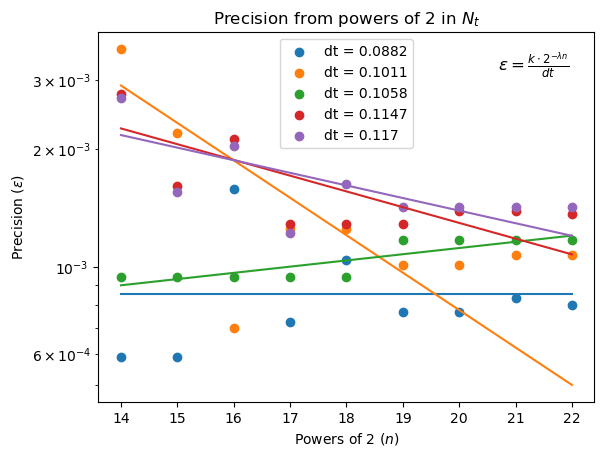

In [161]:
plt.plot(x_dense, model(x_dense, *params_1, dt1), '-')
plt.plot(x_dense, model(x_dense, *params_2, dt2), '-')
plt.plot(x_dense, model(x_dense, *params_3, dt3), '-')
plt.plot(x_dense, model(x_dense, *params_4, dt4), '-')
plt.plot(x_dense, model(x_dense, *params_5, dt5), '-')

plt.scatter(powers_of_2, precision_1, label = f'dt = {dt1}')
plt.scatter(powers_of_2, precision_2, label = f'dt = {dt2}')
plt.scatter(powers_of_2, precision_3, label = f'dt = {dt3}')
plt.scatter(powers_of_2, precision_4, label = f'dt = {dt4}')
plt.scatter(powers_of_2, precision_5, label = f'dt = {dt5}')
plt.xlabel('Powers of 2 ($n$)')
plt.ylabel('Precision ($\epsilon$)')
plt.title('Precision from powers of 2 in $N_t$')
plt.legend()
plt.yscale('log')

plt.text(
    0.95, 0.95, r"$\epsilon = \frac{k \cdot 2^{-\lambda n}}{dt}$",
    transform=plt.gca().transAxes,  # współrzędne względne (0–1)
    ha='right', va='top',
    fontsize=12
)

plt.show()

In [162]:
k = (params_1[0] / (tval * perr_1[0]) ** 2 + params_2[0] / (tval * perr_2[0]) ** 2 + params_3[0] / (tval * perr_3[0]) ** 2 + params_4[0] / (tval * perr_4[0]) ** 2 + params_5[0] / (tval * perr_5[0]) ** 2) / (1 / (tval * perr_1[0]) ** 2 + 1 / (tval * perr_2[0]) ** 2 + 1 / (tval * perr_3[0]) ** 2 + 1 / (tval * perr_4[0]) ** 2 + 1 / (tval * perr_5[0]) ** 2)
k

np.float64(5.7993130258951634e-05)

In [99]:
dk = np.sqrt(1 / (1 / (tval * perr_1[0]) ** 2 + 1 / (tval * perr_2[0]) ** 2 + 1 / (tval * perr_3[0]) ** 2 + 1 / (tval * perr_4[0]) ** 2 + 1 / (tval * perr_5[0]) ** 2))
dk

np.float64(1.952206994803406e-05)

In [100]:
λ = (params_1[1] / (tval * perr_1[1]) ** 2 + params_2[1] / (tval * perr_2[1]) ** 2 + params_3[1] / (tval * perr_3[1]) ** 2 + params_4[1] / (tval * perr_4[1]) ** 2 + params_5[1] / (tval * perr_5[1]) ** 2) / (1 / (tval * perr_1[1]) ** 2 + 1 / (tval * perr_2[1]) ** 2 + 1 / (tval * perr_3[1]) ** 2 + 1 / (tval * perr_4[1]) ** 2 + 1 / (tval * perr_5[1]) ** 2)
λ

np.float64(-0.026643298777498995)

In [101]:
dλ = np.sqrt(1 / (1 / (tval * perr_1[1]) ** 2 + 1 / (tval * perr_2[1]) ** 2 + 1 / (tval * perr_3[1]) ** 2 + 1 / (tval * perr_4[1]) ** 2 + 1 / (tval * perr_5[1]) ** 2))
dλ

np.float64(0.024535351158037868)

In [113]:
def precision_model(x, dt, alpha=7.8e-5, beta=0.1):
    return alpha / dt * 2.0 ** (-beta * x)

def mean_precision_over_x(dt):
    y = precision_model(powers_of_2, dt)
    return np.mean(y)

In [114]:
result = minimize_scalar(mean_precision_over_x, bounds=(0.0045, 0.123), method='bounded')
optimal_dt = result.x
print(f"Optymalne dt: {optimal_dt:.6f}")




Optymalne dt: 0.122995


In [163]:

def model(x, alpha, beta, gamma, dt):
    return alpha * 2.0**(-(beta * dt + gamma) * x) / dt

params_1, matr_cov_1 = curve_fit(lambda x, a, b, c: model(x, a, b, c, dt1), x, precision_1)
perr_1 = np.sqrt(np.diag(matr_cov_1))

params_2, matr_cov_2 = curve_fit(lambda x, a, b, c: model(x, a, b, c, dt2), x, precision_2)
perr_2 = np.sqrt(np.diag(matr_cov_2))

params_3, matr_cov_3 = curve_fit(lambda x, a, b, c: model(x, a, b, c, dt3), x, precision_3)
perr_3 = np.sqrt(np.diag(matr_cov_3))

params_4, matr_cov_4 = curve_fit(lambda x, a, b, c: model(x, a, b, c, dt4), x, precision_4)
perr_4 = np.sqrt(np.diag(matr_cov_4))

params_5, matr_cov_5 = curve_fit(lambda x, a, b, c: model(x, a, b, c, dt5), x, precision_5)
perr_5 = np.sqrt(np.diag(matr_cov_5))

dof = len(powers_of_2) - len(params_1)
tval = t.ppf(0.975, dof)



print(f"Parametry k, beta, gamma dla dt1: {params_1[0]:0.2f} ± {(tval * perr_1[0]):0.2f}, {params_1[1]:0.2f} ± {(tval * perr_1[1]):0.2f}, {params_1[2]:0.2f} ± {(tval * perr_1[2]):0.2f}")
print(f"Parametry k, beta, gamma dla dt2: {params_2[0]:0.2f} ± {(tval * perr_2[0]):0.2f}, {params_2[1]:0.2f} ± {(tval * perr_2[1]):0.2f}, {params_2[2]:0.2f} ± {(tval * perr_2[2]):0.2f}")
print(f"Parametry k, beta, gamma dla dt3: {params_3[0]:0.2f} ± {(tval * perr_3[0]):0.2f}, {params_3[1]:0.2f} ± {(tval * perr_3[1]):0.2f}, {params_2[2]:0.2f} ± {(tval * perr_2[2]):0.2f}")
print(f"Parametry k, beta, gamma dla dt4: {params_4[0]:0.2f} ± {(tval * perr_4[0]):0.2f}, {params_4[1]:0.2f} ± {(tval * perr_4[1]):0.2f}, {params_2[2]:0.2f} ± {(tval * perr_2[2]):0.2f}")
print(f"Parametry k, beta, gamma dla dt5: {params_5[0]:0.2f} ± {(tval * perr_5[0]):0.2f}, {params_5[1]:0.2f} ± {(tval * perr_5[1]):0.2f}, {params_2[2]:0.2f} ± {(tval * perr_2[2]):0.2f}")


Parametry k, beta, gamma dla dt1: 0.00 ± 0.00, -4.75 ± 250308279.75, 0.42 ± 22077190.38
Parametry k, beta, gamma dla dt2: 0.01 ± 0.12, -87.19 ± 597354586.76, 9.13 ± 60392552.05
Parametry k, beta, gamma dla dt3: 0.00 ± 0.00, -6.49 ± 49248295.63, 9.13 ± 60392552.05
Parametry k, beta, gamma dla dt4: 0.00 ± 0.00, -5.19 ± 192084635.22, 9.13 ± 60392552.05
Parametry k, beta, gamma dla dt5: 0.00 ± 0.00, -1.63 ± 75260618.92, 9.13 ± 60392552.05


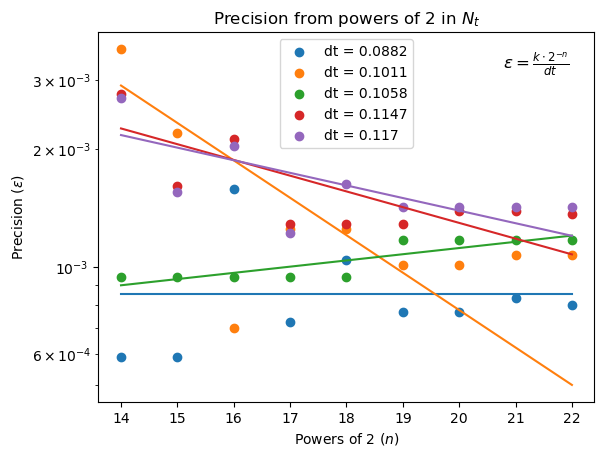

In [164]:
plt.plot(x_dense, model(x_dense, *params_1, dt1), '-')
plt.plot(x_dense, model(x_dense, *params_2, dt2), '-')
plt.plot(x_dense, model(x_dense, *params_3, dt3), '-')
plt.plot(x_dense, model(x_dense, *params_4, dt4), '-')
plt.plot(x_dense, model(x_dense, *params_5, dt5), '-')

plt.scatter(powers_of_2, precision_1, label = f'dt = {dt1}')
plt.scatter(powers_of_2, precision_2, label = f'dt = {dt2}')
plt.scatter(powers_of_2, precision_3, label = f'dt = {dt3}')
plt.scatter(powers_of_2, precision_4, label = f'dt = {dt4}')
plt.scatter(powers_of_2, precision_5, label = f'dt = {dt5}')
plt.xlabel('Powers of 2 ($n$)')
plt.ylabel('Precision ($\epsilon$)')
plt.title('Precision from powers of 2 in $N_t$')
plt.legend()
plt.yscale('log')

plt.text(
    0.95, 0.95, r"$\epsilon = \frac{k \cdot 2^{-n }}{dt}$",
    transform=plt.gca().transAxes,  # współrzędne względne (0–1)
    ha='right', va='top',
    fontsize=12
)

plt.show()

In [144]:
k = (params_1[0] / (tval * perr_1[0]) ** 2 + params_2[0] / (tval * perr_2[0]) ** 2 + params_3[0] / (tval * perr_3[0]) ** 2 + params_4[0] / (tval * perr_4[0]) ** 2 + params_5[0] / (tval * perr_5[0]) ** 2) / (1 / (tval * perr_1[0]) ** 2 + 1 / (tval * perr_2[0]) ** 2 + 1 / (tval * perr_3[0]) ** 2 + 1 / (tval * perr_4[0]) ** 2 + 1 / (tval * perr_5[0]) ** 2)
k

np.float64(5.835249895148468e-05)

In [145]:
dk = np.sqrt(1 / (1 / (tval * perr_1[0]) ** 2 + 1 / (tval * perr_2[0]) ** 2 + 1 / (tval * perr_3[0]) ** 2 + 1 / (tval * perr_4[0]) ** 2 + 1 / (tval * perr_5[0]) ** 2))
dk

np.float64(3.430559480935935e-05)

In [146]:
beta = (params_1[1] / (tval * perr_1[1]) ** 2 + params_2[1] / (tval * perr_2[1]) ** 2 + params_3[1] / (tval * perr_3[1]) ** 2 + params_4[1] / (tval * perr_4[1]) ** 2 + params_5[1] / (tval * perr_5[1]) ** 2) / (1 / (tval * perr_1[1]) ** 2 + 1 / (tval * perr_2[1]) ** 2 + 1 / (tval * perr_3[1]) ** 2 + 1 / (tval * perr_4[1]) ** 2 + 1 / (tval * perr_5[1]) ** 2)
beta

np.float64(-5.395265054496248)

In [147]:
dbeta = np.sqrt(1 / (1 / (tval * perr_1[1]) ** 2 + 1 / (tval * perr_2[1]) ** 2 + 1 / (tval * perr_3[1]) ** 2 + 1 / (tval * perr_4[1]) ** 2 + 1 / (tval * perr_5[1]) ** 2))
dbeta

np.float64(39692585.80785377)

In [149]:
gamma = (params_1[2] / (tval * perr_1[2]) ** 2 + params_2[2] / (tval * perr_2[2]) ** 2 + params_3[2] / (tval * perr_3[2]) ** 2 + params_4[2] / (tval * perr_4[2]) ** 2 + params_5[2] / (tval * perr_5[2]) ** 2) / (1 / (tval * perr_1[2]) ** 2 + 1 / (tval * perr_2[2]) ** 2 + 1 / (tval * perr_3[2]) ** 2 + 1 / (tval * perr_4[2]) ** 2 + 1 / (tval * perr_5[2]) ** 2)
gamma

np.float64(0.5923255344614529)

In [150]:
dgamma = np.sqrt(1 / (1 / (tval * perr_1[2]) ** 2 + 1 / (tval * perr_2[2]) ** 2 + 1 / (tval * perr_3[2]) ** 2 + 1 / (tval * perr_4[2]) ** 2 + 1 / (tval * perr_5[2]) ** 2))
dgamma

np.float64(4298665.79529548)